In [10]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [11]:
fo = pd.ExcelFile('clean-data.xlsx')
df = pd.read_excel(fo, 'Sheet1')

text = df['text']
text_list =  [i.split() for i in text]
print(text_list)
print(len(text_list))

[['makna', 'maiyyah', 'surat', 'taubah'], ['tujuan', 'penciptaan', 'manusia'], ['kaidah', 'mengenal', 'syirik', 'kecil'], ['diberi', 'pahala', 'sesuai', 'kadar', 'niatnya'], ['pembagian', 'tauhid', 'quran'], ['kado', 'indah', 'hari', 'valentine'], ['empat', 'kaidah', 'penting', 'memahami', 'syirik', 'tauhid', 'terjemah', 'qawaaidul', 'arba'], ['iman', 'asma', 'wa', 'sifat', 'allah', 'keutamaannya'], ['makna', 'kedekatan', 'kebersamaan', 'allah'], ['mengucapkan', 'selamat', 'natal', 'basa', 'basi'], ['perayaan', 'natal', 'aqidah', 'wala', 'wal', 'bara', 'dianggap', 'usang'], ['perayaan', 'natal', 'aqidah', 'wala', 'wal', 'bara', 'dianggap', 'usang'], ['perayaan', 'natal', 'aqidah', 'wala', 'wal', 'bara', 'dianggap', 'usang'], ['perayaan', 'natal', 'aqidah', 'wala', 'wal', 'bara', 'dianggap', 'usang'], ['mengenal', 'syirik', 'ashghar', 'syirik', 'kecil'], ['allah', 'mendengar', 'dua', 'telinga'], ['ngalap', 'berkah', 'tubuh', 'orang', 'shalih'], ['iman', 'cukup', 'keyakinan', 'hati'], ['

In [12]:
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list], min_count=10)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [13]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary(452 unique tokens: ['makna', 'surat', 'manusia', 'kaidah', 'kecil']...)


In [14]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

2390
[(92, 1), (111, 1)]


In [15]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

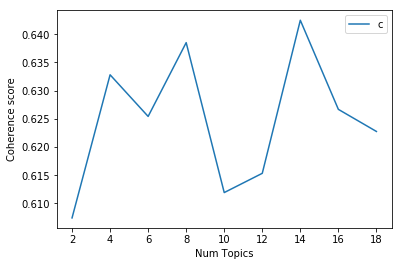

In [16]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6074
Num Topics = 4  has Coherence Value of 0.6328
Num Topics = 6  has Coherence Value of 0.6254
Num Topics = 8  has Coherence Value of 0.6385
Num Topics = 10  has Coherence Value of 0.6119
Num Topics = 12  has Coherence Value of 0.6153
Num Topics = 14  has Coherence Value of 0.6425
Num Topics = 16  has Coherence Value of 0.6267
Num Topics = 18  has Coherence Value of 0.6228


In [22]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)
pprint(model.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

[(0,
  '0.076*"jamaah" + 0.070*"bidah" + 0.051*"ahlus_sunnah" + 0.039*"haruskah" + '
  '0.035*"nikah" + 0.035*"wal" + 0.029*"amalan" + 0.029*"agama" + '
  '0.026*"ahlus" + 0.024*"bulan"'),
 (1,
  '0.071*"syiah" + 0.063*"wanita" + 0.046*"allah" + 0.038*"hadits_dhaif" + '
  '0.036*"memiliki" + 0.031*"haram" + 0.027*"sifat" + 0.026*"memakai" + '
  '0.026*"tafsir_ayat" + 0.018*"hadits_palsu"'),
 (2,
  '0.042*"syubhat" + 0.040*"hadits_dhaif" + 0.040*"sujud" + 0.035*"negeri" + '
  '0.034*"dhaif" + 0.031*"mengusap" + 0.022*"hukum" + 0.022*"yahudi" + '
  '0.020*"hadits" + 0.020*"mahram"'),
 (3,
  '0.196*"hukum" + 0.032*"kubur" + 0.031*"shalat" + 0.028*"memakai" + '
  '0.027*"nabi" + 0.025*"tahun" + 0.024*"seputar" + 0.020*"setan" + '
  '0.020*"quran" + 0.020*"atas"'),
 (4,
  '0.065*"non_muslim" + 0.048*"salah" + 0.037*"quran" + 0.034*"kasih" + '
  '0.033*"non" + 0.031*"muslim" + 0.025*"pemimpin" + 0.023*"baru" + '
  '0.021*"makan" + 0.019*"ahlul"'),
 (5,
  '0.180*"hadits" + 0.036*"bab" + 0.036

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

In [23]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

Topic: 0 Word: 0.060*"fatwa_ulama" + 0.055*"larangan" + 0.049*"sujud" + 0.042*"ulama" + 0.033*"anak" + 0.026*"hukum" + 0.026*"kafir" + 0.023*"mahram" + 0.020*"tercela" + 0.019*"mengusap"
Topic: 1 Word: 0.141*"hadits_palsu" + 0.088*"islam" + 0.046*"palsu" + 0.038*"waris" + 0.037*"hadits" + 0.030*"waswas" + 0.024*"melihat" + 0.024*"membaca_quran" + 0.023*"jumat" + 0.023*"negeri"
Topic: 2 Word: 0.037*"golongan" + 0.035*"syubhat" + 0.034*"syariat" + 0.033*"salaf" + 0.029*"makmum" + 0.026*"pahala" + 0.026*"sahabat" + 0.024*"jilbab" + 0.024*"islam" + 0.023*"keadaan"
Topic: 3 Word: 0.146*"hukum" + 0.051*"wanita" + 0.050*"puasa" + 0.045*"memakai" + 0.033*"sunnah" + 0.031*"wudhu" + 0.028*"tahun" + 0.026*"sekilas" + 0.026*"shalat" + 0.022*"fikih"
Topic: 4 Word: 0.063*"kafir" + 0.058*"hukum" + 0.053*"nikah" + 0.051*"shahih" + 0.042*"orang" + 0.038*"seputar" + 0.030*"hadits" + 0.027*"atas" + 0.022*"jual" + 0.021*"nama"
Topic: 5 Word: 0.068*"hadits_dhaif" + 0.056*"ahlus_sunnah" + 0.052*"syiah" + 0.

In [24]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [25]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
11     8.035286        1       1 -0.043006  0.012369
10     7.861379        1       2  0.099448 -0.115121
12     7.584736        1       3 -0.007678  0.063934
9      7.523500        1       4 -0.049702 -0.123741
8      7.461810        1       5 -0.054776 -0.096372
4      7.430602        1       6 -0.102884 -0.037076
3      7.351437        1       7 -0.124902 -0.100612
7      7.259983        1       8 -0.072828  0.211430
1      7.103852        1       9  0.163193  0.003144
6      6.909320        1      10  0.057294 -0.007175
5      6.568257        1      11  0.092958  0.120073
13     6.477624        1      12  0.159535 -0.005640
2      6.303841        1      13  0.043479  0.008206
0      6.128375        1      14 -0.160129  0.066580, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                